In [1]:
%matplotlib inline

import os
import h5py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from mpl_toolkits.axes_grid1 import make_axes_locatable
from analysis.models.vr import RatCAVESession
from analysis.plots.placecells.F02_AB_cells import all_AB_cells, shift_plot, single_unit_plot
from analysis.plots.trajectory import arena_vs_animal_positions
from analysis.plots.placecells.utils import get_figure_size
from analysis.plots.placecells.draw import draw_occupancy, draw_place_field, draw_place_firing
from analysis.models.analytics import place_field_2D


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Overview

In [3]:
# 00908
sessions = [
    "2019-07-08_17-46-20",  # has some units, 4 VR, 1 arena
    "2019-07-08_22-13-01",  # short session
    "2019-07-08_22-15-41",  # 
    "2019-07-09_08-49-24",  #
    "2019-07-09_17-00-25",
    "2019-07-09_21-59-47",  # no cells?
    "2019-07-10_17-44-31",
    "2019-07-10_22-26-42",
    "2019-07-11_08-24-01",  # 2-7, 2-10, 3-4, 3-5, arena-locked, 2-9, 3-6 VR-locked, 2-10, 3-9 conj
    "2019-07-11_13-06-27",  # 2-3, 2-5 arena-locked, 1-3, 3-6 VR-locked, 2-2, 2-4, 3-7, 3-10 conj
    "2019-07-09_21-59-47",  # poor
    "2019-07-12_17-32-40",  # 3-3, 3-4, 3-5, 3-9 arena-locked, 1-2, 2-4, 3-10 conj
    "2019-07-16_18-30-55",  # poor
    "2019-07-17_21-49-55",  # 2-2, 3-5, 3-10 arena-locked, 3-7, 3-9 VR-locked, 2-3 conj
    "2019-07-18_14-27-52",  # 2-2, 3-2, 3-6 conj
    "2019-07-21_17-29-37",  # 3-4 arena-locked, 3-5 VR-locked, 3-3 conj
    "2019-07-22_10-04-13",  # 2-2, 2-3, 3-2 arena-locked, 3-5 VR-locked
    "2019-07-22_22-25-02",  # 2-3, 3-3, 3-11, 3-13 arena-locked, 3-12 VR-locked, 2-4, 3-5, 3-6, 3-9, 3-10 conj
    "2019-07-24_11-17-34"   # 3-4, 3-9 arena-locked, 3-12, 3-13 VR-locked, 3-2, 3-5, 3-10 conj
]

# 00910
sessions = [
    "2019-07-21_17-01-34"   # 2-5, 2-6 arena-locked, 3-6, 4-3 VR-locked, 4-4, 4-5, 4-6, 4-8 conj
    "2019-07-22_09-46-16",  # 3-3, 5-4, 5-9, 6-2 arena-locked, 5-3, 5-8, 5-10 VR-locked, 3-5, 4-2, 5-2, 5-7 conj
    "2019-07-22_22-05-31",  # 3-3, 4-7, 5-7, 6-2 arena-locked, 4-6, 5-4 VR-locked, 5-3, 5-5, 5-6, 5-9, 5-11 conj
    "2019-07-23_22-01-29",  # has some units, little influence
    "2019-07-25_09-46-22"   # has some units, little influence
]

# 002784
sessions = [
    "2019-07-24_12-17-27"   # has some units, look at ALL; a lot of activity around pillars
]


# 003281
sessions = [
    "2019-10-21_22-25-20",  # 2-2 VR, 2-8 conj
    "2019-10-22_10-12-05",
    "2019-10-23_15-32-59",  # 3-5, 4-2 VR, 4-3, 4-5 arena, 3-4, 4-4 conj
    "2019-10-29_13-13-13",  # 2-3 arena, 2-4, 2-5 conj (PF -> !!)
    "2019-10-29_20-15-08",  # 2-2, 2-3 arena, 2-5, 2-6? conj, 2-7 remap
    "2019-10-30_14-39-20",  # poor data
    "2019-10-31_09-12-48",  # 3-2, 3-5, 4-2 VR
    "2019-11-01_11-18-23",  # 3-2, 3-4, 3-5, 4-2, 4-3 VR, 3-3 arena, 3-6 conj
    "2019-11-01_18-45-22",  # 3-2, 3-14 VR, 3-5, 3-7, 3-11, 3-13 conj
    "2019-11-02_13-38-55",  # 3-2 VR + many cortical-like cells
    "2019-11-05_20-11-18",  # 6-3, 7-2, 7-3, 7-8, 7-9? VR, 7-6 arena, 7-7+ conj
    "2019-11-07_11-51-32"   # 2-2+ conj
]


# 003282
sessions = [
    "2019-10-23_23-00-59",  # ??can be broken (ephys stopped around 9th minute)
    "2019-10-24_13-35-20",  # little influence
    "2019-10-24_21-20-25",  # little influence
    "2019-11-04_09-30-03",  # non-pyr neurons
    "2019-11-05_10-54-13",  # non-pyr neurons, 7-2 arena, 7-6, 7-8+, 7-9?, 7-10 VR, 7-3, 7-4?, 7-7 conj
    "2019-11-05_20-31-59",  # non-pyr neurons, 7-2, 7-3, 7-6, 7-7, 7-10, 7-11 VR, 7-9, 7-12 arena, 7-4, 7-5, 7-8? conj
    "2019-11-06_22-36-07",
    "2019-11-12_10-07-21",  # 3-3, 3-9?, 7-4 arena, 3-10, 3-11, 7-2? VR, 3-5?, 3-6, 7-3 conj
    # ...
    "2019-11-14_13-27-17",  # 4-5 VR, 2-2, 3-4, 3-5, 3-8, 4-3, 4-4, 7-3, 7-4, 7-5, 7-6, 7-7 arena, 3-3 conj
    # ...
    "2019-11-15_10-53-53",
    # ...
    "2019-11-18_10-35-43",  # 3-7, 3-10, 3-11, 3-12, 4-2, 4-4, 7-2, 7-4, 7-10 arena, 3-2, 3-4+?, 3-5, 3-6, 3-8, 3-13, 4-3?, 4-5, 4-7, 4-8?, 4-9-, 4-11, 7-7, 7-9 VR, 3-9, 4-6, 4-10, 7-5, 7-6 conj
    "2019-11-21_09-44-05"
]


source = '/home/andrey/storage2/andrey/data/processed'
animal = '003282'
session_id = '2019-11-06_22-36-07'

sessionpath = os.path.join(source, animal, session_id)

session = RatCAVESession(sessionpath, alpha=4.3)
running_idxs = session.get_running_indexes()[0]

#session.trajectory = session.trajectory[500:]  # remove first 5 seconds to exclude bad positions

if not os.path.exists(os.path.join(sessionpath, 'analysis')):
    os.makedirs(os.path.join(sessionpath, 'analysis'))
    
if not os.path.exists(os.path.join(sessionpath, 'units')):
    os.makedirs(os.path.join(sessionpath, 'units'))

# Bulk PF update in HDF5

In [6]:
def get_arena_traj(ar_traj):
    arena_max = ar_traj[:, 2].max()
    arena_min = ar_traj[:, 2].min()

    ar_traj_A_idx = np.where((ar_traj[:, 2] < arena_min + 0.01))[0]
    ar_traj_B_idx = np.where((ar_traj[:, 2] > arena_max - 0.01))[0]
    
    return ar_traj_A_idx, ar_traj_B_idx

In [7]:
def get_periods(traj):
    periods = []
    
    ar_diffs = np.diff(traj[:, 0])
    arena_periods = np.where((ar_diffs > 3))[0]

    for i, idx in enumerate(arena_periods):
        if i == 0:
            pair = (traj[0][0], traj[idx][0])

        else:
            pair = (traj[arena_periods[i - 1] + 1][0], traj[idx][0])

        periods.append(pair)
        
    return periods

In [8]:
def is_in_periods(t, periods):
    for period in periods:
        if t > period[0] and t < period[1]:
            return True
    return False

In [9]:
# option 1 - slow
#pos_idxs = np.array([np.abs(trajectory[:, 0] - x).argmin() for x in pos_times])

# option 2 - faster
def get_at_freq(trajectory, pos_times):
    curr_pos_t_cnt = 1
    curr_pos_t = pos_times[curr_pos_t_cnt]  # the first one == t_start
    prev_delta = 10**3
    idxs = []

    traj_pos_cnt = 0
    delta_curr = 10**3
    delta_next = 0
    for i, curr_pos_t in enumerate(pos_times):
        delta_curr = np.abs(curr_pos_t - trajectory[traj_pos_cnt][0])
        delta_next = np.abs(curr_pos_t - trajectory[traj_pos_cnt + 1][0])

        while delta_curr > delta_next:
            traj_pos_cnt += 1
            if traj_pos_cnt + 1 >= len(trajectory):
                break
            
            delta_curr = np.abs(curr_pos_t - trajectory[traj_pos_cnt][0])
            delta_next = np.abs(curr_pos_t - trajectory[traj_pos_cnt + 1][0])
        else:
            idxs.append(traj_pos_cnt)
            traj_pos_cnt -= 1

    return np.array(idxs)

In [10]:
def get_traj_AB_idxs(trajectory, arena_trajectory, running_idxs):
    ar_traj_A_idx, ar_traj_B_idx = get_arena_traj(arena_trajectory)

    A_periods = np.array(get_periods(arena_trajectory[ar_traj_A_idx]))
    B_periods = np.array(get_periods(arena_trajectory[ar_traj_B_idx]))

    an_traj_A_idxs = []
    for i, t in enumerate(trajectory[:, 0]):
        if is_in_periods(t, A_periods):
            an_traj_A_idxs.append(i)

    an_traj_A_idxs = np.intersect1d(np.array(an_traj_A_idxs), running_idxs)

    an_traj_B_idxs = []
    for i, t in enumerate(trajectory[:, 0]):
        if is_in_periods(t, B_periods):
            an_traj_B_idxs.append(i)

    an_traj_B_idxs = np.intersect1d(np.array(an_traj_B_idxs), running_idxs)
    
    return an_traj_A_idxs, an_traj_B_idxs, A_periods, B_periods

In [11]:
def get_maps(trajectory, A_periods, B_periods, spike_idxs, running_idxs):

    t_start = trajectory[0][0]
    duration = trajectory[-1][0] - trajectory[0][0]  # in secs
    target_frequency = 50  # Hz
    sample_count = int(duration / (1/50))

    # important to set xy_range the same for both A and B conditions
    xy_range = [
        trajectory[:, 1].min(),
        trajectory[:, 1].max(),
        trajectory[:, 2].min(),
        trajectory[:, 2].max(),
    ]

    pos_times = np.linspace(0, sample_count/50, sample_count + 1) + t_start
    pos_idxs = get_at_freq(trajectory, pos_times)

    maps = []
    for period in [A_periods, B_periods]:
        an_traj_at_f = []
        for i, tyzx in enumerate(trajectory[np.intersect1d(pos_idxs, running_idxs)]):
            if is_in_periods(tyzx[0], period):
                an_traj_at_f.append(tyzx)

        spiking = []
        for i, tyzx in enumerate(trajectory[np.intersect1d(spike_idxs, running_idxs)]):
            if is_in_periods(tyzx[0], period):
                spiking.append(tyzx)

        an_traj_at_f = np.array(an_traj_at_f)
        spiking = np.array(spiking)

        omap, smap, fmap, s_firing_map = place_field_2D(an_traj_at_f[:, 1:3], spiking[:, 1:3], target_frequency, bin_size=0.03, xy_range=xy_range)
        maps.append([omap, smap, fmap, s_firing_map])
        
    return maps, xy_range

## Get sessions

In [4]:
# get folders with sessions
df = pd.read_csv(os.path.join('/home/andrey/storage2/andrey/data/projects', 'unit_stats.csv'), dtype=str)

sessions_list = []  # animal, session
for index, row in df[df['type'] == 'SHIFT physical 30'].iterrows():
    animal = row['animal']
    folder = row['folder']
    
    if [animal, folder] not in sessions_list:
        sessions_list.append([animal, folder])

sessions_list

[['003281', '2019-10-22_10-12-05'],
 ['003281', '2019-10-21_22-25-20'],
 ['003281', '2019-10-23_15-32-59'],
 ['003281', '2019-10-24_17-48-14'],
 ['003281', '2019-10-23_22-25-54'],
 ['003281', '2019-10-29_13-13-13'],
 ['003281', '2019-10-29_20-15-08'],
 ['003281', '2019-10-30_14-39-20'],
 ['003281', '2019-10-31_09-12-48'],
 ['003281', '2019-11-01_11-18-23'],
 ['003281', '2019-11-01_18-45-22'],
 ['003281', '2019-11-02_13-38-55'],
 ['003281', '2019-11-05_20-11-18'],
 ['003281', '2019-11-07_11-51-32'],
 ['003281', '2019-11-19_08-48-35'],
 ['003282', '2019-10-24_13-35-20'],
 ['003282', '2019-10-23_23-00-59'],
 ['003282', '2019-10-24_21-20-25'],
 ['003282', '2019-11-04_09-30-03'],
 ['003282', '2019-11-05_10-54-13'],
 ['003282', '2019-11-05_20-31-59'],
 ['003282', '2019-11-06_22-36-07'],
 ['003282', '2019-11-12_10-07-21'],
 ['003282', '2019-11-15_10-53-53'],
 ['003282', '2019-11-18_10-35-43'],
 ['00908', '2019-07-09_08-49-24'],
 ['00908', '2019-07-08_22-15-41'],
 ['00908', '2019-07-08_17-46-2

## Compute and Save place fields data to HDF5

In [22]:
# many sessions detected above
sessions = list(sessions_list)

# or a single session
#sessions = [['003281', '2019-10-21_22-25-20']]

total = len(sessions)

for scnt, session_pair in enumerate(sessions):
    animal_id = session_pair[0]
    session_id = session_pair[1]
    h5file = os.path.join(source, animal_id, session_id, 'all.h5')
    
    f = h5py.File(h5file, 'r')

    units_group = f['units']
    unit_names = [name for name in units_group]

    f.close()

    for unit_group_name in unit_names:

        electrode = unit_group_name.split('_')[0]
        unit = unit_group_name.split('_')[1]

        # ---- reading from file -----

        f = h5py.File(h5file, 'r')

        was_processed = 'A_occupancy' in f['units']['%s_%s' % (electrode, unit)].keys()
        
        # get positions
        trajectory = np.array(f['animal_trajectory'])
        arena_trajectory = np.array(f['arena_trajectory'])

        # get spike indexes
        spike_idxs = np.array(f['units']['%s_%s' % (electrode, unit)]['trajectory_indexes'])

        # get running indexes
        running_idxs = np.array(f['running_idxs'])[0]

        f.close()

        #if was_processed:
        #    continue
        
        # ---- preparing data -----

        # animal A / B trajectory indexes
        an_traj_A_idxs, an_traj_B_idxs, A_periods, B_periods = get_traj_AB_idxs(trajectory, arena_trajectory, running_idxs)

        # Spiking maps
        maps, xy_range = get_maps(trajectory, A_periods, B_periods, spike_idxs, running_idxs)

        # ---- storing to the file -----

        f = h5py.File(h5file, 'r+')

        # saving A / B running indexes

        if 'A_indexes' in f.keys():
            del f['A_indexes']

        if 'B_indexes' in f.keys():
            del f['B_indexes']

        f.create_dataset('A_indexes', data=np.array(an_traj_A_idxs))
        f['A_indexes'].attrs['description'] = "Trajectory indexes for condition A"

        f.create_dataset('B_indexes', data=np.array(an_traj_B_idxs))
        f['B_indexes'].attrs['description'] = "Trajectory indexes for condition B"

        # saving spiking maps
        unit_group = f['units']['%s_%s' % (electrode, unit)]

        for name in ['A_occupancy', 'A_spiking', 'A_firing', 'A_place_field', 'B_occupancy', 'B_spiking', 'B_firing', 'B_place_field']:
            if name in unit_group.keys():
                del unit_group[name]

        unit_group.create_dataset('A_occupancy', data=np.array(maps[0][0]))
        unit_group.create_dataset('A_spiking', data=np.array(maps[0][1]))
        unit_group.create_dataset('A_firing', data=np.array(maps[0][2]))
        unit_group.create_dataset('A_place_field', data=np.array(maps[0][3]))
        unit_group.create_dataset('B_occupancy', data=np.array(maps[1][0]))
        unit_group.create_dataset('B_spiking', data=np.array(maps[1][1]))
        unit_group.create_dataset('B_firing', data=np.array(maps[1][2]))
        unit_group.create_dataset('B_place_field', data=np.array(maps[1][3]))

        unit_group.attrs['xy_range'] = np.array(xy_range)

        f.close()

        #print('\rElectrode %s Unit %s processed' % (electrode, unit), end="")
        
    print('Session %s done (%s of %s)' % (session_id, scnt + 1, len(sessions)))

Session 2019-10-22_10-12-05 done (1 of 47)
Session 2019-10-21_22-25-20 done (2 of 47)
Session 2019-10-23_15-32-59 done (3 of 47)
Session 2019-10-24_17-48-14 done (4 of 47)
Session 2019-10-23_22-25-54 done (5 of 47)
Session 2019-10-29_13-13-13 done (6 of 47)
Session 2019-10-29_20-15-08 done (7 of 47)
Session 2019-10-30_14-39-20 done (8 of 47)
Session 2019-10-31_09-12-48 done (9 of 47)
Session 2019-11-01_11-18-23 done (10 of 47)
Session 2019-11-01_18-45-22 done (11 of 47)
Session 2019-11-02_13-38-55 done (12 of 47)
Session 2019-11-05_20-11-18 done (13 of 47)
Session 2019-11-07_11-51-32 done (14 of 47)
Session 2019-11-19_08-48-35 done (15 of 47)
Session 2019-10-24_13-35-20 done (16 of 47)
Session 2019-10-23_23-00-59 done (17 of 47)
Session 2019-10-24_21-20-25 done (18 of 47)
Session 2019-11-04_09-30-03 done (19 of 47)
Session 2019-11-05_10-54-13 done (20 of 47)
Session 2019-11-05_20-31-59 done (21 of 47)
Session 2019-11-06_22-36-07 done (22 of 47)
Session 2019-11-12_10-07-21 done (23 of 4

## Save unit plots

In [9]:
# many sessions detected above
sessions = list(sessions_list)

# or a single session
#sessions = [['003281', '2019-10-21_22-25-20']]

total = len(sessions)

for i, (animal, session_id) in enumerate(sessions):

    # reading data
    sessionpath = os.path.join(source, animal, session_id)
    h5file = os.path.join(sessionpath, 'all.h5')
    f = h5py.File(h5file, 'r')

    trajectory = np.array(f['animal_trajectory'])
    A_indexes = np.array(f['A_indexes'])
    B_indexes = np.array(f['B_indexes'])
    
    unit_groups = [x for x in f['units']]

    f.close()
    
    # processing single units
    for unit_group_name in unit_groups:
        
        # ------------- reading unit data ---------------
    
        f = h5py.File(h5file, 'r')
        
        electrode = unit_group_name.split('_')[0]
        unit = unit_group_name.split('_')[1]

        unit_group = f['units']['%s_%s' % (electrode, unit)]

        pos_firing = np.array(unit_group['trajectory_indexes'])

        pfA = np.array(unit_group['A_place_field'])
        pfB = np.array(unit_group['B_place_field'])
        
        informationA = unit_group['A_place_field'].attrs['information']
        sparsityA = unit_group['A_place_field'].attrs['sparsity']
        selectivityA = unit_group['A_place_field'].attrs['selectivity']
        inf_contentA = unit_group['A_place_field'].attrs['information_content']
        coherenceA = unit_group['A_place_field'].attrs['spatial_coherence']
        
        informationB = unit_group['B_place_field'].attrs['information']
        sparsityB = unit_group['B_place_field'].attrs['sparsity']
        selectivityB = unit_group['B_place_field'].attrs['selectivity']
        inf_contentB = unit_group['B_place_field'].attrs['information_content']
        coherenceB = unit_group['B_place_field'].attrs['spatial_coherence']
        
        fmapA = np.array(unit_group['A_firing'])
        fmapB = np.array(unit_group['B_firing'])

        fieldsA = np.array(unit_group['A_fields'])
        fieldsB = np.array(unit_group['B_fields'])

        COMa = np.array(unit_group['A_fields_COMs']) if 'A_fields_COMs' in unit_group else None
        COMb = np.array(unit_group['B_fields_COMs']) if 'B_fields_COMs' in unit_group else None

        extent = np.array(unit_group.attrs['xy_range'])
        
        f.close()

        # ------------- plots ---------------

        fig = figure(figsize=(12, 24))

        limits = get_figure_size(trajectory[:, 1:3], border=0.05)

        # spiking + trajectories
        axPosA = fig.add_subplot(4,2,1)
        unit_firing_A_idxs = np.intersect1d(pos_firing, A_indexes)
        draw_place_firing(axPosA, trajectory[A_indexes][:, 1:3], trajectory[unit_firing_A_idxs][:, 1:3], limits=limits)

        axPosB = fig.add_subplot(4,2,2)
        unit_firing_B_idxs = np.intersect1d(pos_firing, B_indexes)
        draw_place_firing(axPosB, trajectory[B_indexes][:, 1:3], trajectory[unit_firing_B_idxs][:, 1:3], limits=limits)


        # firing maps
        axSpkA = fig.add_subplot(4,2,3)
        axSpkA.grid(True)
        axSpkA.set_xlabel('X, m')
        axSpkA.set_xlim(limits[0], limits[1])
        axSpkA.set_ylim(limits[2], limits[3])
        pos = axSpkA.imshow(fmapA.T, cmap='jet', origin='lower', extent=extent, interpolation='nearest')

        axSpkB = fig.add_subplot(4,2,4)
        axSpkB.grid(True)
        axSpkB.set_xlabel('X, m')
        axSpkB.set_xlim(limits[0], limits[1])
        axSpkB.set_ylim(limits[2], limits[3])
        axSpkB.imshow(fmapB.T, cmap='jet', origin='lower', extent=extent, interpolation='nearest')

        # place fields
        axA = fig.add_subplot(4,2,5)
        posPFA = draw_place_field(axA, pfA, limits, extent=extent)
        divider = make_axes_locatable(axA)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(posPFA, cax=cax)
        textstr = '\n'.join((
            'inf=%.2f' % (informationA, ),
            'spa=%.2f' % (sparsityA, ),
            'sel=%.2f' % (selectivityA, ),
            'sic=%.2f' % (inf_contentA, ),
            'coh=%.2f' % (coherenceA, )
        ))
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axA.text(0.05, 0.95, textstr, transform=axA.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

        axB = fig.add_subplot(4,2,6)
        posPFB = draw_place_field(axB, pfB, limits, extent=extent)
        divider = make_axes_locatable(axB)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(posPFB, cax=cax)
        textstr = '\n'.join((
            'inf=%.2f' % (informationB, ),
            'spa=%.2f' % (sparsityB, ),
            'sel=%.2f' % (selectivityB, ),
            'sic=%.2f' % (inf_contentB, ),
            'coh=%.2f' % (coherenceB, )
        ))
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axB.text(0.05, 0.95, textstr, transform=axB.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
        
        
        # selected field patches
        axFieldsA = fig.add_subplot(4,2,7)
        axFieldsA.grid(True)
        axFieldsA.set_xlabel('X, m')
        axFieldsA.set_xlim(limits[0], limits[1])
        axFieldsA.set_ylim(limits[2], limits[3])
        axFieldsA.imshow(fieldsA.T, cmap='Pastel2', origin='lower', extent=extent, interpolation='nearest')
        if COMa is not None:
            axFieldsA.scatter(COMa[:, 1], COMa[:, 2], s=100, marker="o", color="black")
            for irow, row in enumerate(COMa):
                f_id = row[0]
                f_peak_rate = row[3]
                txt = "%d (%.1f)" % (f_id, f_peak_rate)
                axFieldsA.annotate(txt, (COMa[:, 1][irow] + 0.05, COMa[:, 2][irow] + 0.05), fontsize=14)

        axFieldsB = fig.add_subplot(4,2,8)
        axFieldsB.grid(True)
        axFieldsB.set_xlabel('X, m')
        axFieldsB.set_xlim(limits[0], limits[1])
        axFieldsB.set_ylim(limits[2], limits[3])
        axFieldsB.imshow(fieldsB.T, cmap='Pastel2', origin='lower', extent=extent, interpolation='nearest')
        if COMb is not None:
            axFieldsB.scatter(COMb[:, 1], COMb[:, 2], s=100, marker="o", color="black")
            for irow, row in enumerate(COMb):
                f_id = row[0]
                f_peak_rate = row[3]
                txt = "%d (%.1f)" % (f_id, f_peak_rate)
                axFieldsB.annotate(txt, (COMb[:, 1][irow] + 0.05, COMb[:, 2][irow] + 0.05), fontsize=14)

        # aliases for COMs on the opposite plots
        if COMb is not None:
            axFieldsA.scatter(COMb[:, 1], COMb[:, 2], alpha=0.2, s=100, marker="o", color="black")
        if COMa is not None:
            axFieldsB.scatter(COMa[:, 1], COMa[:, 2], alpha=0.2, s=100, marker="o", color="black")

        # ------------- saving to .PNG ---------------

        if not os.path.exists(os.path.join(sessionpath, 'analysis')):
            os.makedirs(os.path.join(sessionpath, 'analysis'))
        if not os.path.exists(os.path.join(sessionpath, 'analysis', 'placefields')):
            os.makedirs(os.path.join(sessionpath, 'analysis', 'placefields'))

        filename = "%s_%s_%s_%s.png" % (animal, session_id, electrode, unit)
        fig.savefig(os.path.join(os.path.join(sessionpath, 'analysis', 'placefields'), filename))
        
        plt.close(fig)
        plt.clf()

    # print("\rProcessed: ", session_id, round(100. * float(i+1) / total, 2), "%", "%s/%s" % (i+1, total), end="")
    print('Session %s done (%s of %s)' % (session_id, i + 1, len(sessions)))
        

Session 2019-10-22_10-12-05 done (1 of 47)
Session 2019-10-21_22-25-20 done (2 of 47)
Session 2019-10-23_15-32-59 done (3 of 47)
Session 2019-10-24_17-48-14 done (4 of 47)
Session 2019-10-23_22-25-54 done (5 of 47)
Session 2019-10-29_13-13-13 done (6 of 47)
Session 2019-10-29_20-15-08 done (7 of 47)
Session 2019-10-30_14-39-20 done (8 of 47)
Session 2019-10-31_09-12-48 done (9 of 47)
Session 2019-11-01_11-18-23 done (10 of 47)
Session 2019-11-01_18-45-22 done (11 of 47)
Session 2019-11-02_13-38-55 done (12 of 47)
Session 2019-11-05_20-11-18 done (13 of 47)
Session 2019-11-07_11-51-32 done (14 of 47)
Session 2019-11-19_08-48-35 done (15 of 47)
Session 2019-10-24_13-35-20 done (16 of 47)
Session 2019-10-23_23-00-59 done (17 of 47)
Session 2019-10-24_21-20-25 done (18 of 47)
Session 2019-11-04_09-30-03 done (19 of 47)
Session 2019-11-05_10-54-13 done (20 of 47)
Session 2019-11-05_20-31-59 done (21 of 47)
Session 2019-11-06_22-36-07 done (22 of 47)
Session 2019-11-12_10-07-21 done (23 of 4

In [36]:
h5file = os.path.join(source, animal, session_id, 'all.h5')

f = h5py.File(h5file, 'r')

unit = f['units']['2_7']
pf = np.array(unit['A_place_field'])


# print('A_fields_COMs' in unit)
# print('B_fields_COMs' in unit)

#for unit_group_name in f['units']:
    #do something

f.close()

# Place field shift analysis

In [41]:
#source = '/home/andrey/projects/data/'

# many sessions detected above
sessions = list(sessions_list)

# or a single session
# sessions = [
#     ['003282', '2019-11-06_22-36-07'],
#     ['003282', '2019-11-18_10-35-43'],
# ]

total = len(sessions)

for i, (animal, session_id) in enumerate(sessions):
    sessionpath = os.path.join(source, animal, session_id)
    h5file = os.path.join(sessionpath, 'all.h5')
    with h5py.File(h5file, 'r') as f:
        unit_groups = [x for x in f['units']]

    # processing single units
    for unit_group_name in unit_groups:
        
        # ------------- reading unit data ---------------
    
        f = h5py.File(h5file, 'r')
        
        electrode = unit_group_name.split('_')[0]
        unit = unit_group_name.split('_')[1]

        unit_group = f['units']['%s_%s' % (electrode, unit)]

        fieldsA = np.array(unit_group['A_fields'])
        fieldsB = np.array(unit_group['B_fields'])

        COMa = np.array(unit_group['A_fields_COMs']) if 'A_fields_COMs' in unit_group else None
        COMb = np.array(unit_group['B_fields_COMs']) if 'B_fields_COMs' in unit_group else None
        
        xy_range = np.array(unit_group.attrs['xy_range'])
        
        f.close()
        
        num_fields_A = len(np.unique(fieldsA)) - 1
        num_fields_B = len(np.unique(fieldsB)) - 1
        
        shift_in_meters = 0.3
        shift_in_bins = round(shift_in_meters / ((xy_range[3] - xy_range[2])/fieldsA.shape[1]))
        
        if num_fields_A < 1 or num_fields_B < 1:
            # TODO process cases when PF disappears separately
            continue
            
        metrics = []
        for field_A_id in [x for x in np.unique(fieldsA) if not x == 0]:
            field_data = []
            
            for field_B_id in [y for y in np.unique(fieldsB) if not y == 0]:
                
                # compute overlap +0
                fA_idxs = np.where(np.flipud(fieldsA.T).flatten() == field_A_id)[0]
                fB_idxs = np.where(np.flipud(fieldsB.T).flatten() == field_B_id)[0]
                intersection_0 = np.intersect1d(fA_idxs, fB_idxs)

                COM1 = COMa[(COMa[:, 0] == field_A_id)][0]
                COM2 = COMb[(COMb[:, 0] == field_B_id)][0]
                COM_shift_0 = np.sqrt((COM2[1] - COM1[1])**2 + (COM2[2] - COM1[2])**2)
               
                # compute overlap y + 0.3
                intersection_30 = np.intersect1d(fA_idxs, fB_idxs + int(shift_in_bins * fieldsB.shape[0]))
                COM_shift_30 = np.sqrt((COM2[1] - COM1[1])**2 + (COM2[2] - shift_in_meters - COM1[2])**2)
                
                y_shift = COM2[2] - COM1[2]  # just vertical shift
                
                # field_A size, field_B size, overlap at 0, overlap at -30, COM shift at 0, COM shift at 30
                data = [len(fA_idxs), len(fB_idxs), len(intersection_0), len(intersection_30), COM_shift_0, COM_shift_30, y_shift]
                field_data.append(data)

            metrics.append(field_data)
                
        with h5py.File(h5file, 'r+') as f:
            unit_group = f['units']['%s_%s' % (electrode, unit)]
            try:
                del unit_group['COMShift']
            except:
                pass

            unit_group.create_dataset('COMShift', data=np.array(metrics))
            
        #print("%s %s : %s" % (electrode, unit, metrics))

## Plot COM shifts

In [119]:
#source = '/home/andrey/projects/data/'

# many sessions detected above
sessions = list(sessions_list)

# or a single session
# sessions = [
#     ['003282', '2019-11-06_22-36-07'],
#     ['003282', '2019-11-18_10-35-43'],
# ]
stats = []
excluded = []

for i, (animal, session_id) in enumerate(sessions):
    sessionpath = os.path.join(source, animal, session_id)
    h5file = os.path.join(sessionpath, 'all.h5')
    with h5py.File(h5file, 'r') as f:
        unit_groups = [x for x in f['units']]

    # processing single units
    for unit_group_name in unit_groups:
        
        # ------------- reading unit data ---------------
    
        f = h5py.File(h5file, 'r')
        
        electrode = unit_group_name.split('_')[0]
        unit = unit_group_name.split('_')[1]

        unit_group = f['units']['%s_%s' % (electrode, unit)]

        COMShiftMatrix = np.array(unit_group['COMShift'])
        
        fieldsA = np.array(unit_group['A_fields'])
        fieldsB = np.array(unit_group['B_fields'])

        COMa = np.array(unit_group['A_fields_COMs']) if 'A_fields_COMs' in unit_group else None
        COMb = np.array(unit_group['B_fields_COMs']) if 'B_fields_COMs' in unit_group else None

        sicA = unit_group['A_place_field'].attrs['information_content']
        sicB = unit_group['B_place_field'].attrs['information_content']
        
        xy_range = np.array(unit_group.attrs['xy_range'])
        
        f.close()
        
        # ------------- plotting ---------------

        for i, field_A_shifts in enumerate(COMShiftMatrix):
            
            field_A_id = i + 1  # current field
            field_B_id = 1  # start with the first one
            
            distance_img = 100  # very large distance
            overlap = 0
            
            for j, pair_metrics in enumerate(field_A_shifts):
                isect_coeff0 = pair_metrics[2] / ((pair_metrics[0] + pair_metrics[1]) / 2)
                isect_coeff30 = pair_metrics[3] / ((pair_metrics[0] + pair_metrics[1]) / 2)
                
                curr_dist = pair_metrics[4] if isect_coeff0 > isect_coeff30 else pair_metrics[5]
                curr_over = isect_coeff0 if isect_coeff0 > isect_coeff30 else isect_coeff30
                
                if curr_dist < distance_img:
                    distance_img = float(curr_dist)
                    #distance_real = float(pair_metrics[4])
                    distance_real = float(pair_metrics[6])  # dY
                    overlap = float(curr_over)
                    field_B_id = j + 1
                    
            fA_size = fieldsA[(fieldsA == field_A_id)].sum()
            fB_size = fieldsB[(fieldsB == field_B_id)].sum()
            delta_field_size = (fB_size - fA_size) / (fA_size + fB_size)
            
            peak_FRa = COMa[COMa[:, 0] == field_A_id][0][3]
            peak_FRb = COMb[COMb[:, 0] == field_B_id][0][3]
            
            row = [
                animal, 
                session_id, 
                int(electrode), 
                int(unit), 
                field_A_id, 
                field_B_id, 
                overlap, 
                distance_img, 
                distance_real,
                sicA,
                sicB,
                len(COMa),        # number of fields in A
                len(COMb),        # number of fields in B
                peak_FRa,         # peak firing rate A
                peak_FRb,         # peak firing rate B
                delta_field_size  # relative change in field size 
            ]
            if overlap > 0.0:
                stats.append(row)
            else:
                excluded.append(row)
            

print("PF match found for %d fields, %d fields remapped" % (len(stats), len(excluded)))

data_s = np.array([x[2:] for x in stats])
data_e = np.array([x[2:] for x in excluded])

PF match found for 717 fields, 188 fields remapped


### Filters: information content > 0.2, FR > 2Hz, number of fields

In [91]:
# sic > 0.2 only
idxs_ic = np.where((data_s[:, 7] > 0.2) & (data_s[:, 8] > 0.2))[0]

# firing rate > 2 Hz
idxs_fr = np.where((data_s[:, 11] > 2) & (data_s[:, 12] > 2))[0]

# only single place fields
idxs_fn = np.where((data_s[:, 9] == 1) & (data_s[:, 10] == 1))[0]
#idxs_fn = np.where((data_s[:, 9] > 1) | (data_s[:, 10] > 1))[0]

132


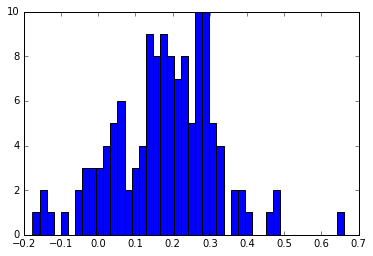

In [124]:
idxs = np.intersect1d(np.intersect1d(idxs_ic, idxs_fr), idxs_fn)

print(len(idxs))
    
# histogram of COM shifts
#a = plt.hist(data_s[idxs][:, 6], 40)  # interesting 3-modal distribution? 
a = plt.hist(data_s[idxs][:, 6], 44)  

### 3 groups of shifts

In [100]:
delta = 0.075

# no shift: 0 +-0.75
idxs_0 = np.where((data_s[:, 6] > 0 - delta) & (data_s[:, 6] < 0 + delta))[0]

# medium shift: +0.15 +-0.75
idxs_15 = np.where((data_s[:, 6] > 0.15 - delta) & (data_s[:, 6] < 0.15 + delta))[0]

# full arena shift: +0.3 +-0.75
idxs_30 = np.where((data_s[:, 6] > 0.3 - delta) & (data_s[:, 6] < 0.3 + delta))[0]

In [120]:
len(idxs_0), len(idxs_30)

(125, 227)

44
0.554571980318


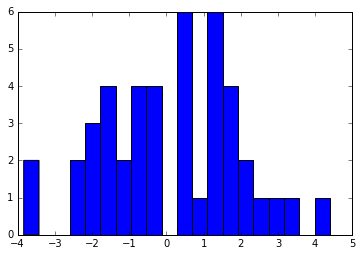

In [118]:
idxs = np.intersect1d(np.intersect1d(idxs_ic, idxs_fr), idxs_fn)

idxs = np.intersect1d(idxs, idxs_30)

print(len(idxs))

# delta field size
#a = plt.hist(data_s[idxs][:, 13], 20)

# delta firing rate
med_fr = np.median(data_s[idxs][:, 12] - data_s[idxs][:, 11])
print(med_fr)

a = plt.hist(data_s[idxs][:, 12] - data_s[idxs][:, 11], 20)

### Filter fields with a shift between 0.1 and 0.25

003281:2019-10-23_22-25-54, 4-3_1-1, Over:0.60; 0.15, dY: 0.15, SIC: 0.37,0.42, fNum: 1-1
003281:2019-10-29_13-13-13, 3-4_1-1, Over:0.75; 0.14, dY: 0.17, SIC: 0.10,0.05, fNum: 1-1
003281:2019-11-01_11-18-23, 4-3_1-1, Over:0.55; 0.14, dY: 0.12, SIC: 0.50,0.34, fNum: 1-1
003281:2019-11-01_18-45-22, 3-14_1-1, Over:0.79; 0.11, dY: 0.11, SIC: 0.37,0.30, fNum: 1-1
003281:2019-11-05_20-11-18, 6-2_1-1, Over:0.69; 0.15, dY: 0.14, SIC: 0.18,0.20, fNum: 1-1
003281:2019-11-05_20-11-18, 7-8_1-1, Over:0.63; 0.17, dY: 0.17, SIC: 0.28,0.25, fNum: 1-1
003281:2019-11-19_08-48-35, 2-3_1-1, Over:0.56; 0.19, dY: 0.18, SIC: 0.21,0.17, fNum: 1-1
003281:2019-11-19_08-48-35, 3-3_1-1, Over:0.49; 0.14, dY: 0.16, SIC: 0.44,0.26, fNum: 1-1
003282:2019-10-24_13-35-20, 3-4_1-1, Over:0.89; 0.17, dY: 0.13, SIC: 0.08,0.07, fNum: 1-1
003282:2019-10-23_23-00-59, 4-8_1-1, Over:0.59; 0.14, dY: 0.14, SIC: 0.13,0.11, fNum: 1-1
003282:2019-10-24_21-20-25, 3-2_1-1, Over:0.56; 0.17, dY: 0.14, SIC: 0.22,0.07, fNum: 1-1
003282:20

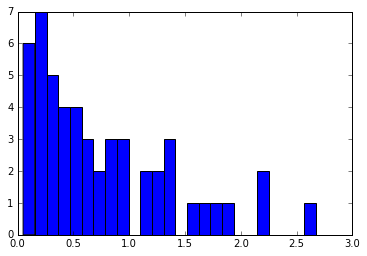

In [71]:
idxs = np.where((data_s[:, 9] == 1) & (data_s[:, 10] == 1) & (data_s[:, 6] > 0.1) & (data_s[:, 6] < 0.2))[0]
#idxs = np.where((data_s[:, 6] > 0.15) & (data_s[:, 6] < 0.2))[0]

def render(row):
    return "%s:%s, %d-%d_%d-%d, Over:%.2f; %.2f, dY: %.2f, SIC: %.2f,%.2f, fNum: %d-%d" % tuple(row)

print('\n'.join([render(stats[i]) for i in idxs]))

a = plt.hist(data_s[idxs][:, 8], 25)

## Clean some H5 groups

In [29]:
# many sessions detected above
sessions = list(sessions_list)

# or a single session
#sessions = [['003281', '2019-10-21_22-25-20']]

for i, (animal, session_id) in enumerate(sessions):
    h5file = os.path.join(source, animal, session_id, 'all.h5')

    f = h5py.File(h5file, 'r+')

    for unit_group_name in f['units']:
        try:
            del f['units'][unit_group_name]['A_fields']
        except:
            pass

        try:
            del f['units'][unit_group_name]['B_fields']
        except:
            pass

        try:
            del f['units'][unit_group_name]['A_fields_COMs']
        except:
            pass

        try:
            del f['units'][unit_group_name]['B_fields_COMs']
        except:
            pass

    f.close()


# Available units

In [206]:
#session.tetrodes[3] = {}  # supress cortical units in this session


session.tetrode_unit_map

{1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 8: []}

# Preparing data

In [162]:
arena_move_type = 'physical'

if arena_move_type == 'physical':
    ar_traj = session.arena_trajectory

if arena_move_type == 'visual':
    ar_traj = np.column_stack((session.trajectory[:, 0], np.zeros(len(session.trajectory)), np.zeros(len(session.trajectory))))

    t_start = ar_traj[0][0]
    traj_norm = ar_traj[:, 0] - t_start
    idx = np.where((traj_norm % 60 > 35) & (traj_norm % 60 < 60))

    ar_traj[idx] = ar_traj[idx] + np.array([0, 0, 0.3])

arena_max = ar_traj[:, 2].max()
arena_min = ar_traj[:, 2].min()

# cut the bad data outside arena
# x_lim = [-0.55, 0.20]
# y_lim = [-0.75, 0.90]

# traj = session.trajectory
# session.trajectory = traj[(traj[:, 1] > x_lim[0]) & (traj[:, 1] < x_lim[1]) & (traj[:, 2] > y_lim[0]) & (traj[:, 2] < y_lim[1])]

# positions Arena + 0, Arena + 30
ar_traj_0 = ar_traj[(ar_traj[:, 2] < arena_min + 0.005)]
ar_traj_1 = ar_traj[(ar_traj[:, 2] > arena_max - 0.005)]

ar_traj_0_idx = np.where((ar_traj[:, 2] < arena_min + 0.005))[0]
ar_traj_1_idx = np.where((ar_traj[:, 2] > arena_max - 0.005))[0]


In [164]:
# only running periods
an_traj_0_idxs = np.array([x for x in ar_traj_0_idx if x in running_idxs])
an_traj_1_idxs = np.array([x for x in ar_traj_1_idx if x in running_idxs])

an_traj_0 = session.trajectory[an_traj_0_idxs]
an_traj_1 = session.trajectory[an_traj_1_idxs]

# Arena and animal Z positions

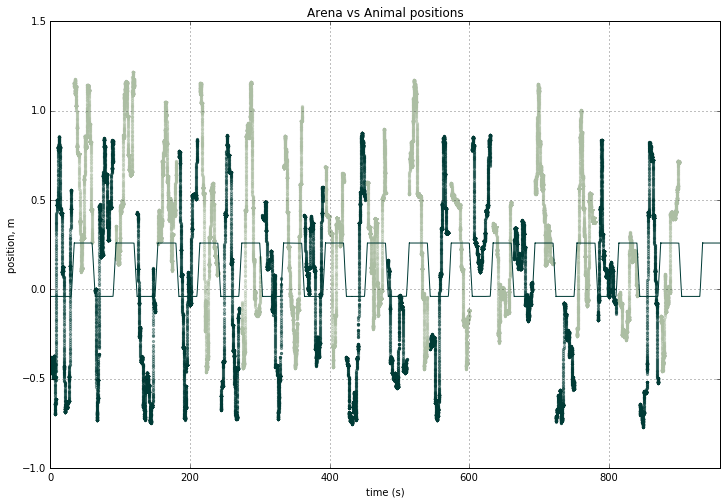

In [78]:
an_traj_A = trajectory[A_indexes]
an_traj_B = trajectory[B_indexes]

fig = arena_vs_animal_positions(ar_traj, an_traj_A, an_traj_B)

# All cells firing maps

Processing unit group 7..

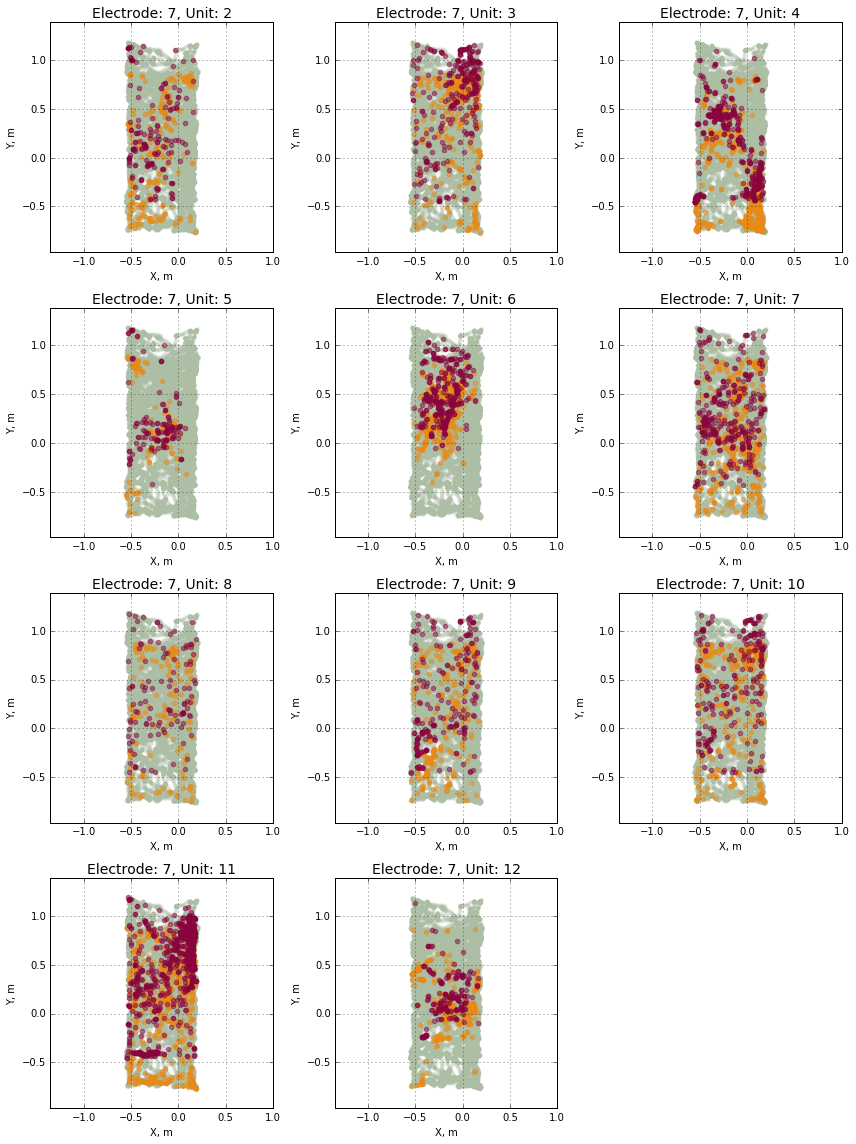

In [207]:
fig = all_AB_cells(session, A_indexes, B_indexes)

filename = "all_units.png"
fig.savefig(os.path.join(os.path.join(sessionpath, 'analysis'), filename))

# Single Unit firing map

In [157]:
def get_data_for_fields(ttd, unit, sampling_rate=50):
    # positions when unit fires for A + 0 and A + 30
    unit_fire_0 = session.get_positions_for_unit(ttd, unit, an_traj_0_idxs, refresh=True)
    unit_fire_1 = session.get_positions_for_unit(ttd, unit, an_traj_1_idxs, refresh=True)

    # all positions for A + 0
    pos_at_f0 = [an_traj_0[0]]
    for pos in an_traj_0:
        if pos[0] - pos_at_f0[-1][0] > (1 / float(sampling_rate)):
            pos_at_f0.append(pos)

    pos_at_f0 = np.array(pos_at_f0)

    # all positions for A + 30
    pos_at_f1 = [an_traj_1[0]]
    for pos in an_traj_1:
        if pos[0] - pos_at_f1[-1][0] > (1 / float(sampling_rate)):
            pos_at_f1.append(pos)

    pos_at_f1 = np.array(pos_at_f1)
    
    return unit_fire_0, unit_fire_1, pos_at_f0, pos_at_f1

In [2]:
if False:
    for ttd, units in session.tetrode_unit_map.items():
        for unit in units:
            unit_fire_0, unit_fire_1, pos_at_f0, pos_at_f1 = get_data_for_fields(ttd, unit)
            fig = single_unit_plot(session, ttd, unit, unit_fire_0, unit_fire_1, pos_at_f0, pos_at_f1, an_traj_0, an_traj_1)

            filename = "firing_ttd_%s_unit_%s.png" % (ttd, unit)
            fig.savefig(os.path.join(os.path.join(sessionpath, 'analysis'), filename))

            print("TTD %s Unit %s processed" % (ttd, unit))

            del(fig)


# Trajectory playground

In [268]:
np.set_printoptions(suppress=True, formatter={'float_kind':'{:16.5f}'.format}, linewidth=130)

session.trajectory[0:10, [0, -1]]

array([[1562945569.83080,     186840.00549],
       [1562945569.83280,     186900.00114],
       [1562945569.84580,     187290.00149],
       [1562945569.85580,     187590.00120],
       [1562945569.86780,     187950.00372],
       [1562945569.88280,     188399.99971],
       [1562945569.90480,     189060.00195],
       [1562945569.91780,     189450.00229],
       [1562945569.93180,     189870.00046],
       [1562945569.94280,     190200.00515]])